# Decision Tree Classification

## 1.information content criterion (from scratch)

In [1]:
import numpy as np
from collections import Counter

* To numerically measure the improvement of partitions at each stage, we introduce some * criterion of information content *, which will assess the diversity of objects in the sample: the more different classes in the sample, the greater the value of H (R). The smaller the weighted value of the criterion after splitting, the better *

Function for calculating the entropy quality criterion:
$H(R) = -\sum_{k=1}^{K}p_klogp_k$

In [2]:
def HEntropy(l):
    length = len(l)
    cnt = Counter(l)
    entropy = 0
    for i in cnt.keys():
        entropy += cnt[i]/length*np.log2(cnt[i]/length)
    return (-1)*entropy
    
    pass #здесь ваш код

Gini criterion:

In [3]:
def HGini(l):
    length = len(l)
    cnt = Counter(l)
    entropy = 0
    for i in cnt.keys():
        entropy += cnt[i]/length*(1-cnt[i]/length)
    return entropy
    pass #здесь ваш код

In [4]:
print(HGini([2]*5+[3]*3+[4]))

0.5679012345679012


*Information Gain (IG)* -quality functional that answers the question, how much entropy did we extinguish with a certain partition? At each step of the partition, IG is maximized when building the tree. Formula for calculation with the criterion of information content H:

$IG(R) = H(R) - \frac{|R_l|}{|R|}H(R_l) - \frac{|R_r|}{|R|}H(R_r)$

In [5]:
def IG(H, l, i):
    return H(l) - i/len(l)*H(l[:i]) - (len(l)-i)/len(l)*H(l[i:])
    pass #здесь ваш код

Visualization of criterion working quality 

In [6]:
def test_H(H, l):
    print("{:5} {:3}   {:4} {:4} {:4}".format("#","l","IG","Hl","Hr"))
    print("-"*24)
    for i in range(1,len(l)):
        print("{:2}. {:3}   {:.2f} {:.2f} {:.2f}".format(i, l[i], IG(H, l, i), H(l[:i]), H(l[i:])))

In [7]:
l = [1]*5 + [2]*3 + [1]*4
print(l)
HEntropy(l)

[1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1]


0.8112781244591328

In [8]:
test_H(HEntropy, l)

#     l     IG   Hl   Hr  
------------------------
 1.   1   0.04 -0.00 0.85
 2.   1   0.08 -0.00 0.88
 3.   1   0.12 -0.00 0.92
 4.   1   0.17 -0.00 0.95
 5.   2   0.24 -0.00 0.99
 6.   2   0.03 0.65 0.92
 7.   2   0.01 0.86 0.72
 8.   1   0.17 0.95 -0.00
 9.   1   0.12 0.92 -0.00
10.   1   0.08 0.88 -0.00
11.   1   0.04 0.85 -0.00


In [9]:
test_H(HGini, l)

#     l     IG   Hl   Hr  
------------------------
 1.   1   0.01 0.00 0.40
 2.   1   0.02 0.00 0.42
 3.   1   0.04 0.00 0.44
 4.   1   0.06 0.00 0.47
 5.   2   0.09 0.00 0.49
 6.   2   0.01 0.28 0.44
 7.   2   0.00 0.41 0.32
 8.   1   0.06 0.47 0.00
 9.   1   0.04 0.44 0.00
10.   1   0.02 0.42 0.00
11.   1   0.01 0.40 0.00


In [10]:
best_i = 7
test_H(HGini,l[:best_i])

#     l     IG   Hl   Hr  
------------------------
 1.   1   0.03 0.00 0.44
 2.   1   0.07 0.00 0.48
 3.   1   0.12 0.00 0.50
 4.   1   0.22 0.00 0.44
 5.   2   0.41 0.00 0.00
 6.   2   0.17 0.28 0.00


In [11]:
test_H(HEntropy,l[:best_i])

#     l     IG   Hl   Hr  
------------------------
 1.   1   0.08 -0.00 0.92
 2.   1   0.17 -0.00 0.97
 3.   1   0.29 -0.00 1.00
 4.   1   0.47 -0.00 0.92
 5.   2   0.86 -0.00 -0.00
 6.   2   0.31 0.65 -0.00


## 2.Visualization of classification precision: sklearn

#### 1. iris

In [12]:
from sklearn.datasets import load_iris
import pandas as pd

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
iris = load_iris()

In [15]:
df = pd.DataFrame(columns = iris.feature_names,data = iris.data)
df['species'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Let's display the pairwise distribution of the features of the dataset with coloring by the type of flower

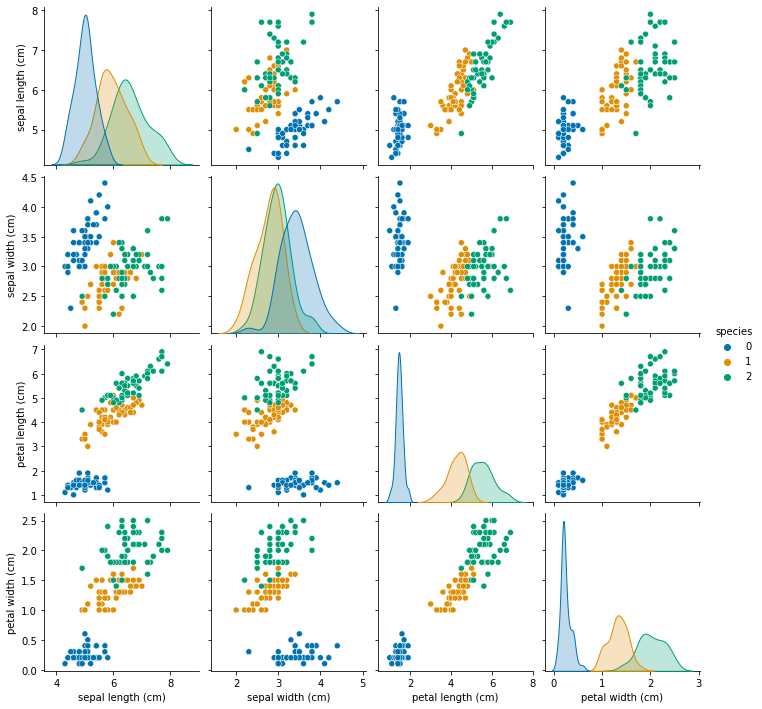

In [17]:
sns.pairplot(df, hue='species', diag_kind="kde", palette="colorblind");

In [18]:
Xcut = df[['sepal width (cm)','petal length (cm)']]

#### 2. Use classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
clf = DecisionTreeClassifier()

In [21]:
clf.fit(Xcut, df.species)

DecisionTreeClassifier()

In [22]:
clf.predict([ [1,1], [3,3] ])

array([0, 1])

In [23]:
clf.predict_proba([ [1,1], [3,3] ])

array([[1., 0., 0.],
       [0., 1., 0.]])

Lets share how it works:

In [24]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [25]:
def test_clf(clf, X, y, cmap=None, fit_clf=False):
    xx,yy = get_grid(X.values)
    if fit_clf:
        clf.fit(X, y)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, predicted, cmap=cmap or 'spring')
    plt.scatter(X.values[:, 0], X.values[:, 1], c='blue', s=100, cmap=cmap or 'spring', edgecolors='black')
    if fit_clf:
        return clf

<ipython-input-25-ba778276a792>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap=cmap or 'spring')


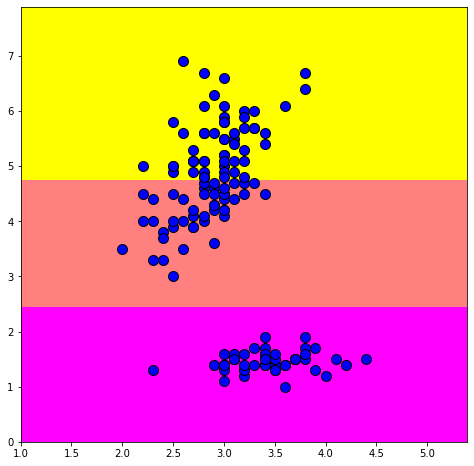

In [26]:
clf = test_clf(DecisionTreeClassifier(max_depth=3), Xcut, df.species, fit_clf=True)

#### 3. Visualization of tress

A tree is a flat graph, so it can be easily visualized!

We can do it in notebook and also with : http://www.webgraphviz.com

(we need .dot of tree)

In [27]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [28]:
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(Xcut, df.species)

DecisionTreeClassifier(max_depth=10)

In [29]:
get_tree_dot_view(clf, list(Xcut.columns), iris.target_names)

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa", fillcolor="#ffffff"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petal length (cm) <= 4.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor", fillcolor="#ffffff"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="sepal width (cm) <= 2.55\ngini = 0.043\nsamples = 45\nvalue = [0, 44, 1]\nclass = versicolor", fillcolor="#3de684"] ;
2 -> 3 ;
4 [label="petal length (cm) <= 4.45\ngini = 0.142\nsamples = 13\nvalue = [0, 12, 1]\nclass = versicolor", fillcolor="#49e78c"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 11\nvalue = [0, 11, 0]\nclass = versicolor", fillcolor="#39e581"] ;
4 -> 5 ;
6 [label="sepal width (cm) <= 2.35\ngini = 0.5\nsamples = 2\nvalue = [0,

-----

-----

## 3. Feature importantes

=

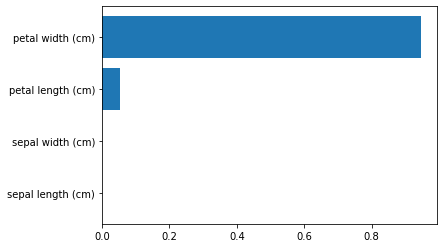

In [30]:
clf = DecisionTreeClassifier(max_depth=3)
X = df.drop('species',axis=1)
y = df.species
clf.fit(X,y)

plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(X.columns)),X.columns);


## 4. Overfitting right now

In [35]:
np.seed = 7
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]
train_data = pd.DataFrame(train_data)

In [36]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(train_data,train_labels,random_state = 42, train_size = 0.7)

In [37]:
params = {'max_depth':range(1,20),'criterion' : ['gini','entropy'],
          'min_samples_split':range(2,10)}
gridsearch = GridSearchCV(DecisionTreeClassifier(random_state=42), params, scoring='accuracy', cv=10)
gridsearch.fit(X1_train,y1_train)
print(accuracy_score(gridsearch.predict(X1_test),y1_test))
gridsearch.best_params_

NameError: name 'GridSearchCV' is not defined

In [ ]:
plt.scatter(train_data[0], train_data[1], c=train_labels, s=100, cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

In [ ]:
clf = test_clf(DecisionTreeClassifier(max_depth=1), train_data, train_labels, cmap='autumn', fit_clf=True)

In [ ]:
clf = test_clf(DecisionTreeClassifier(), train_data, train_labels, cmap='autumn', fit_clf=True)

### Tree visualization in notebook

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

tree.plot_tree(clf, feature_names=list(X),max_depth=2,
               class_names = ['Negative','Positive'],
               filled = True);

In [ ]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=600)
tree.plot_tree(clf, max_depth=None,
               feature_names = fn, 
               class_names=cn, fontsize=4,
               filled = True);

### Search best params:

In [ ]:
iris = load_iris()
df = pd.DataFrame(columns = iris.feature_names,data = iris.data)
df['species'] = iris.target
X = df.drop('species',axis=1)
y = df['species']

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size = 0.7)

In [39]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)
accuracy_score(clf.predict(X_test),y_test)
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [40]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':range(1,10),'criterion' : ['gini','entropy'],
          'min_samples_split':range(2,10)}
gridsearch = GridSearchCV(DecisionTreeClassifier(random_state=42), params, scoring='accuracy', cv=5)
gridsearch.fit(X_train,y_train)
accuracy_score(gridsearch.predict(X_test),y_test)

0.9238095238095239

In [41]:
gridsearch.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}